In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.optimizers import SGD, Adam
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
'定義子資料夾名稱&對應的數字，檔名不能有中文'
class_names = ['Brown-Headed Barbet','Buffalo','butterfly','cat','Cattle Egret','chicken','Common Kingfisher','Common Myna','Common Rosefinch','Common Tailorbird','Coppersmith Barbet','cow','deer','dog','elephant','Forest Wagtail','fox','gharial','Gray Wagtail','Green Bee-Eater','Hoopoe','horse','House Crow','hyena','Indian Grey Hornbill','Indian Pitta','Indian Roller','Jungle Babbler','kangaroo','leopard','lion','Northern Lapwing','pangolin','Peacock','Python','Red-Wattled Lapwing','Rhino','Ruddy Shelduck','Rufous Treepie','Russell\'s Viper','Sarus Crane','shark','sheep','spider','tiger','White Wagtail','White-Breasted Kingfisher','White-Breasted Waterhen','wolf','zebra']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (64, 64)

In [3]:
def load_data():
    datasets = ['training_set', 'test_set']#資料夾
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                try:
                    # Get the path name of the image
                    img_path = os.path.join(os.path.join(dataset, folder), file)

                    # Open and resize the img
                    image = cv2.imread(img_path)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    #cv讀照片，顏色莫認為BGR，需轉為RGB，錯誤表示黑白或已轉
                    image = cv2.resize(image, IMAGE_SIZE) 

                    # Append the image and its corresponding label to the output
                    images.append(image)
                    labels.append(label)
                except:
                    print(img_path)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading training_set


100%|█████████████████████████████████████████████████████████████████████████████| 1074/1074 [00:02<00:00, 499.17it/s]


Loading test_set


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 62.48it/s]


In [5]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [6]:
'隨機性'
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)
'標準化'
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [7]:
'建模'
input_shape = (64, 64, 3)

model = Sequential([
    Conv2D(128, (3, 3), input_shape=input_shape, padding='same',
           activation='sigmoid', strides=2),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.25),
    Conv2D(256, (3, 3), input_shape=input_shape, padding='same',
           activation='sigmoid', strides=2),
    Dropout(0.2),
    Conv2D(256, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    Dropout(0.15),
    Conv2D(512, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    Dropout(0.1),
    Conv2D(512, (3, 3), input_shape=input_shape, padding='same',
           activation='relu', strides=2),
    Dropout(0.5),
    Flatten(),
    Dense(50, activation='softmax') #輸出層，分類用softmax
])
model.compile(optimizer = 'adam', #SGD(lr=0.1)
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit(train_images, train_labels, 
                    #validation_data=(test_images, test_labels),
                    #verbose=2,callbacks=[earlyStop],
                    batch_size=128, epochs=300)

Epoch 1/300
456/456 [==============================] - 19s 20ms/step - loss: 3.6347 - accuracy: 0.0953
Epoch 2/300
456/456 [==============================] - 9s 20ms/step - loss: 3.6186 - accuracy: 0.0950
Epoch 3/300
456/456 [==============================] - 9s 19ms/step - loss: 3.6120 - accuracy: 0.0959
Epoch 4/300
456/456 [==============================] - 9s 20ms/step - loss: 3.5238 - accuracy: 0.1188
Epoch 5/300
456/456 [==============================] - 9s 19ms/step - loss: 3.2608 - accuracy: 0.1798
Epoch 6/300
456/456 [==============================] - 9s 19ms/step - loss: 3.0994 - accuracy: 0.2093
Epoch 7/300
456/456 [==============================] - 9s 19ms/step - loss: 2.9980 - accuracy: 0.2308
Epoch 8/300
456/456 [==============================] - 9s 20ms/step - loss: 2.9130 - accuracy: 0.2463
Epoch 9/300
456/456 [==============================] - 9s 19ms/step - loss: 2.8520 - accuracy: 0.2603
Epoch 10/300
456/456 [==============================] - 9s 20ms/step - loss: 2.78

456/456 [==============================] - 9s 19ms/step - loss: 0.8065 - accuracy: 0.7590
Epoch 81/300
456/456 [==============================] - 9s 19ms/step - loss: 0.7977 - accuracy: 0.7607
Epoch 82/300
456/456 [==============================] - 9s 19ms/step - loss: 0.7841 - accuracy: 0.7639
Epoch 83/300
456/456 [==============================] - 9s 19ms/step - loss: 0.7677 - accuracy: 0.7708
Epoch 84/300
456/456 [==============================] - 9s 19ms/step - loss: 0.7693 - accuracy: 0.7709
Epoch 85/300
456/456 [==============================] - 9s 20ms/step - loss: 0.7571 - accuracy: 0.7726
Epoch 86/300
456/456 [==============================] - 9s 19ms/step - loss: 0.7586 - accuracy: 0.7742
Epoch 87/300
456/456 [==============================] - 9s 19ms/step - loss: 0.7439 - accuracy: 0.7766
Epoch 88/300
456/456 [==============================] - 9s 20ms/step - loss: 0.7325 - accuracy: 0.7790
Epoch 89/300
456/456 [==============================] - 9s 19ms/step - loss: 0.7299 - 

456/456 [==============================] - 9s 19ms/step - loss: 0.4427 - accuracy: 0.8682
Epoch 160/300
456/456 [==============================] - 9s 19ms/step - loss: 0.4522 - accuracy: 0.8660
Epoch 161/300
456/456 [==============================] - 9s 19ms/step - loss: 0.4496 - accuracy: 0.8672
Epoch 162/300
456/456 [==============================] - 9s 19ms/step - loss: 0.4359 - accuracy: 0.8703
Epoch 163/300
456/456 [==============================] - 9s 19ms/step - loss: 0.4330 - accuracy: 0.8720
Epoch 164/300
456/456 [==============================] - 9s 19ms/step - loss: 0.4317 - accuracy: 0.8710
Epoch 165/300
456/456 [==============================] - 9s 19ms/step - loss: 0.4267 - accuracy: 0.8724
Epoch 166/300
456/456 [==============================] - 9s 19ms/step - loss: 0.4352 - accuracy: 0.8716
Epoch 167/300
456/456 [==============================] - 9s 19ms/step - loss: 0.4396 - accuracy: 0.8717
Epoch 168/300
456/456 [==============================] - 9s 19ms/step - loss: 

456/456 [==============================] - 8s 19ms/step - loss: 0.3313 - accuracy: 0.9053
Epoch 238/300
456/456 [==============================] - 9s 19ms/step - loss: 0.3442 - accuracy: 0.9012
Epoch 239/300
456/456 [==============================] - 8s 19ms/step - loss: 0.3344 - accuracy: 0.9031
Epoch 240/300
456/456 [==============================] - 8s 19ms/step - loss: 0.3312 - accuracy: 0.9045
Epoch 241/300
456/456 [==============================] - 9s 19ms/step - loss: 0.3305 - accuracy: 0.9038
Epoch 242/300
456/456 [==============================] - 9s 19ms/step - loss: 0.3360 - accuracy: 0.9031
Epoch 243/300
456/456 [==============================] - 9s 19ms/step - loss: 0.3338 - accuracy: 0.9031
Epoch 244/300
456/456 [==============================] - 9s 19ms/step - loss: 0.3299 - accuracy: 0.9048
Epoch 245/300
456/456 [==============================] - 9s 19ms/step - loss: 0.3308 - accuracy: 0.9050
Epoch 246/300
456/456 [==============================] - 9s 19ms/step - loss: 

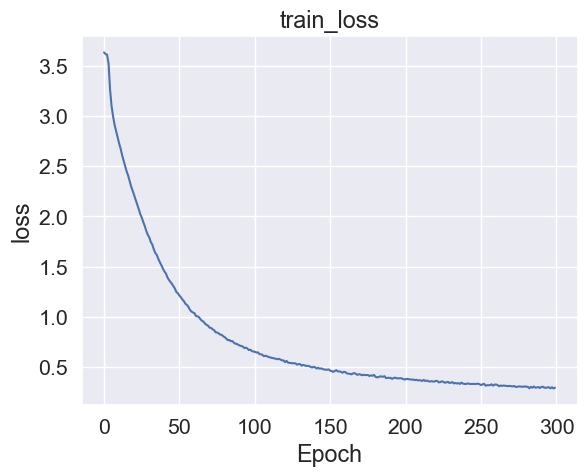

In [9]:
'模型概況'
plt.title('train_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.plot(history.history["loss"])
#scores = model.evaluate(test_images, test_labels)  
#print('test:',result[1])

In [20]:
'預測'
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

19/19 [==============================] - 0s 21ms/step


In [21]:
'混淆矩陣'
CM = confusion_matrix(test_labels, pred_labels)
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 
print(accuracy(CM))

0.4835924006908463


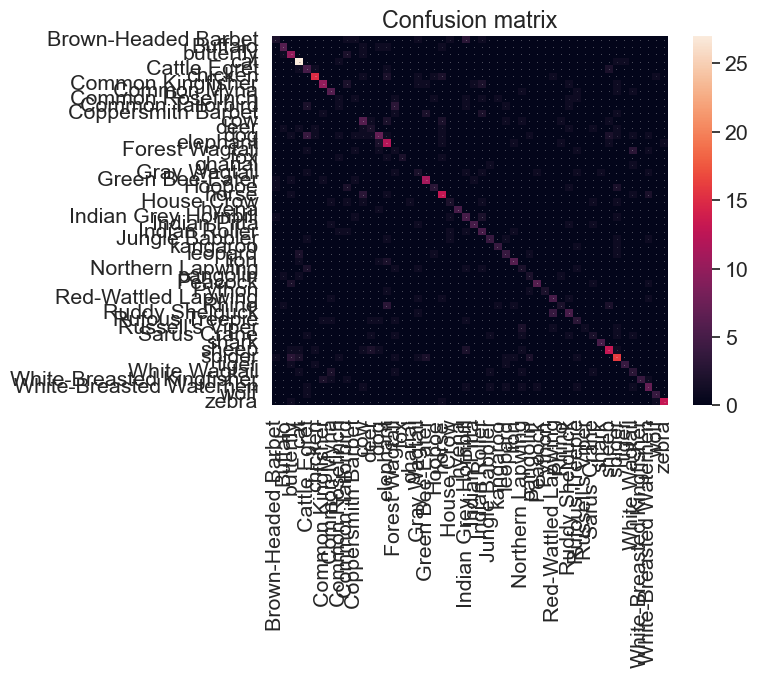

In [16]:
'混淆矩陣視覺化，看錯誤'
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 1}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [14]:
'存模型&讀模型'
from keras.models import load_model
model.save("31003-04_model")

INFO:tensorflow:Assets written to: 31003-02_model\assets


INFO:tensorflow:Assets written to: 31003-02_model\assets
